In [1]:
# load fall /not fall data

In [72]:
import numpy as np
import pandas as pd
import os

columns_to_select = ['x-axis (g)', 'y-axis (g)', 'z-axis (g)']
# Function to process a single DataFrame and separate signals
def process_data(data):
    fall_signals = []
    not_fall_signals = []

    current_signal = []
    current_label = None

    for index, row in data.iterrows():
        if current_label is None:
            current_label = row['outcome']

        if row['outcome'] != current_label:
            if current_label == 1:
                fall_signals.append(np.array(current_signal))
            else:
                not_fall_signals.append(np.array(current_signal))

            current_signal = []
            current_label = row['outcome']

        current_signal.append(row[columns_to_select])

    if current_label == 1:
        fall_signals.append(np.array(current_signal))
    else:
        not_fall_signals.append(np.array(current_signal))

    return fall_signals, not_fall_signals



In [73]:
folder_path = "/home/x_l30/Diffusion/Diffusion_Research/datasets/FallData"
all_fall_signals = []
all_not_fall_signals = []

# Iterate through all CSV files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        csv_file = os.path.join(folder_path, filename)
        print(f'Open the file: {csv_file}')
        data = pd.read_csv(csv_file)
        
        # Assuming the data point column is named 'data_point' and the label column is named 'label'
        # Change the column names accordingly if they are different in your CSV files
        
        fall_signals, not_fall_signals = process_data(data)
        print(f'In this file there are {len(fall_signals)} fall signals and {len(not_fall_signals)} not fall signals. ')
        all_fall_signals.extend(fall_signals)
        all_not_fall_signals.extend(not_fall_signals)

# Print the length of separated signals
print("Fall signals:")
for i, signal in enumerate(all_fall_signals):
    print(f"Signal {i + 1}: {len(signal)}")

print("\nNot fall signals:")
for i, signal in enumerate(all_not_fall_signals):
    print(f"Signal {i + 1}: {len(signal)}")

Open the file: /home/x_l30/Diffusion/Diffusion_Research/datasets/FallData/4_subhashRightFall_MetaWear3_2022-04-12T15.22.56.965_F0BC52DCEED6_Accelerometer_50.000Hz_1.5.1_labeled-3copy.csv
In this file there are 5 fall signals and 4 not fall signals. 
Open the file: /home/x_l30/Diffusion/Diffusion_Research/datasets/FallData/1_sushashBackfall_MetaWear3_2022-04-12T15.21.29.842_F0BC52DCEED6_Accelerometer_50.000Hz_1.5.1_labeled-3copy.csv
In this file there are 5 fall signals and 4 not fall signals. 
Open the file: /home/x_l30/Diffusion/Diffusion_Research/datasets/FallData/11_robRightFall_MetaWear4_2022-04-02T18.31.38.660_CBF265108764_Accelerometer_50.000Hz_1.5.1_labeled.csv
In this file there are 5 fall signals and 5 not fall signals. 
Open the file: /home/x_l30/Diffusion/Diffusion_Research/datasets/FallData/yangBackfall_MetaWear3_2022-04-12T15.02.04.225_F0BC52DCEED6_Accelerometer_50.000Hz_1.5.1_labeled copy.csv
In this file there are 5 fall signals and 4 not fall signals. 
Open the file: /h

In [74]:
filtered_not_fall_signals = np.array([signal for signal in all_not_fall_signals if len(signal) != 1])

<ipython-input-74-3b6511e20aae>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  filtered_not_fall_signals = np.array([signal for signal in all_not_fall_signals if len(signal) != 1])


In [75]:
for i, signal in enumerate(filtered_not_fall_signals):
    print(f"Signal {i + 1}: {len(signal)}")

Signal 1: 101
Signal 2: 101
Signal 3: 101
Signal 4: 101
Signal 5: 101
Signal 6: 101
Signal 7: 101
Signal 8: 101
Signal 9: 101
Signal 10: 101
Signal 11: 101
Signal 12: 101
Signal 13: 101
Signal 14: 101
Signal 15: 101
Signal 16: 101
Signal 17: 101
Signal 18: 101
Signal 19: 101
Signal 20: 101
Signal 21: 101
Signal 22: 101
Signal 23: 195
Signal 24: 101
Signal 25: 101
Signal 26: 101
Signal 27: 101
Signal 28: 101
Signal 29: 101
Signal 30: 101
Signal 31: 101
Signal 32: 101
Signal 33: 101
Signal 34: 101
Signal 35: 101
Signal 36: 101
Signal 37: 101
Signal 38: 101
Signal 39: 101
Signal 40: 101
Signal 41: 95
Signal 42: 101
Signal 43: 101
Signal 44: 101
Signal 45: 101
Signal 46: 101
Signal 47: 101
Signal 48: 101
Signal 49: 101
Signal 50: 101
Signal 51: 101
Signal 52: 101
Signal 53: 101
Signal 54: 101
Signal 55: 101
Signal 56: 101
Signal 57: 101
Signal 58: 101
Signal 59: 101
Signal 60: 101
Signal 61: 59
Signal 62: 101
Signal 63: 101
Signal 64: 101
Signal 65: 101
Signal 66: 101
Signal 67: 101
Signal

In [84]:
filtered_not_fall_signals[0].shape

(101, 3)

In [85]:
all_fall_signals[0].shape

(101, 3)

In [86]:
# Target length for all resampled signals
from scipy import signal
target_length = 96

# Function to resample multi-channel signals
def resample_multichannel_signal(sig, target_length):
    sig = sig.reshape(sig.shape[1], sig.shape[0])
    num_channels = sig.shape[0]
    resampled_signal = np.zeros((num_channels, target_length))
    
    for i in range(num_channels):
        resampled_signal[i, :] = signal.resample(sig[i, :], target_length)
        
    return resampled_signal

# Resample the signals to the target length
resampled_fall_signals = [resample_multichannel_signal(sig, target_length) for sig in all_fall_signals]
resampled_not_fall_signals = [resample_multichannel_signal(sig, target_length) for sig in filtered_not_fall_signals]


resampled_fall_signals signal 1: 3
resampled_fall_signals signal 2: 3
resampled_fall_signals signal 3: 3
resampled_fall_signals signal 4: 3
resampled_fall_signals signal 5: 3
resampled_fall_signals signal 6: 3
resampled_fall_signals signal 7: 3
resampled_fall_signals signal 8: 3
resampled_fall_signals signal 9: 3
resampled_fall_signals signal 10: 3
resampled_fall_signals signal 11: 3
resampled_fall_signals signal 12: 3
resampled_fall_signals signal 13: 3
resampled_fall_signals signal 14: 3
resampled_fall_signals signal 15: 3
resampled_fall_signals signal 16: 3
resampled_fall_signals signal 17: 3
resampled_fall_signals signal 18: 3
resampled_fall_signals signal 19: 3
resampled_fall_signals signal 20: 3
resampled_fall_signals signal 21: 3
resampled_fall_signals signal 22: 3
resampled_fall_signals signal 23: 3
resampled_fall_signals signal 24: 3
resampled_fall_signals signal 25: 3
resampled_fall_signals signal 26: 3
resampled_fall_signals signal 27: 3
resampled_fall_signals signal 28: 3
r

In [87]:
# Print the resampled signals
for idx, resampled_signal in enumerate(resampled_fall_signals):
    print(f"resampled_fall_signals signal {idx + 1}: {len(resampled_signal[0])}")
    
for idx, resampled_signal in enumerate(resampled_not_fall_signals):
    print(f"resampled_not_fall_signals signal {idx + 1}: {len(resampled_signal[0])}")

resampled_fall_signals signal 1: 96
resampled_fall_signals signal 2: 96
resampled_fall_signals signal 3: 96
resampled_fall_signals signal 4: 96
resampled_fall_signals signal 5: 96
resampled_fall_signals signal 6: 96
resampled_fall_signals signal 7: 96
resampled_fall_signals signal 8: 96
resampled_fall_signals signal 9: 96
resampled_fall_signals signal 10: 96
resampled_fall_signals signal 11: 96
resampled_fall_signals signal 12: 96
resampled_fall_signals signal 13: 96
resampled_fall_signals signal 14: 96
resampled_fall_signals signal 15: 96
resampled_fall_signals signal 16: 96
resampled_fall_signals signal 17: 96
resampled_fall_signals signal 18: 96
resampled_fall_signals signal 19: 96
resampled_fall_signals signal 20: 96
resampled_fall_signals signal 21: 96
resampled_fall_signals signal 22: 96
resampled_fall_signals signal 23: 96
resampled_fall_signals signal 24: 96
resampled_fall_signals signal 25: 96
resampled_fall_signals signal 26: 96
resampled_fall_signals signal 27: 96
resampled_

In [1]:
import matplotlib.pyplot as plt
def plot_signal(signal, title=None):
    """
    Plots a signal with x, y, and z channels using matplotlib.

    Args:
        x (array-like): Data for the x channel.
        y (array-like): Data for the y channel.
        z (array-like): Data for the z channel.
        title (str, optional): Title for the plot. Defaults to None.
    """
    
    plt.figure()
    plt.plot(signal[0][:], label='x channel')
    plt.plot(signal[1][:], label='y channel')
    plt.plot(signal[2][:], label='z channel')

    if title is not None:
        plt.title(title)

    plt.xlabel('Time Steps')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

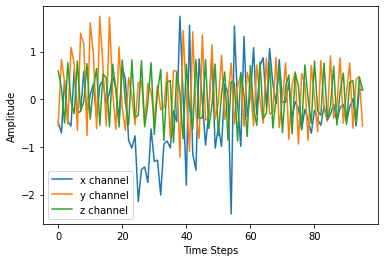

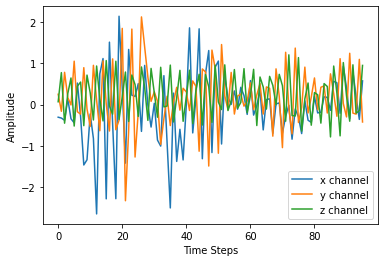

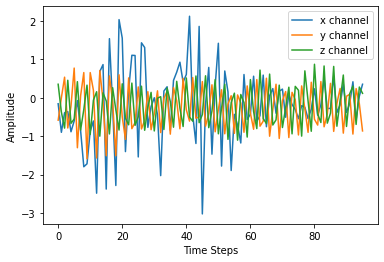

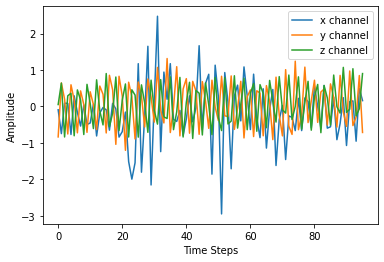

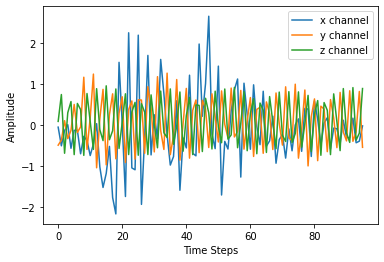

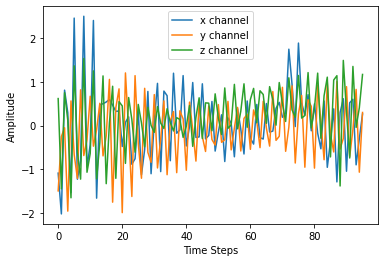

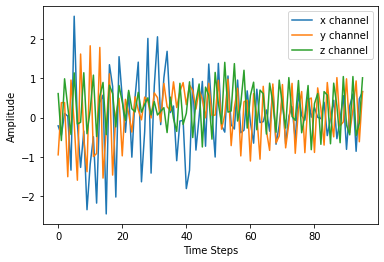

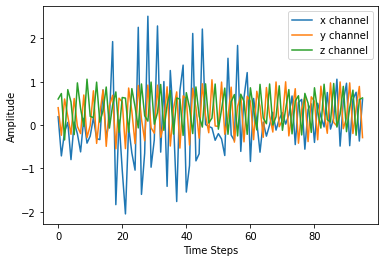

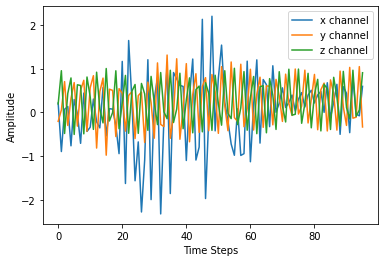

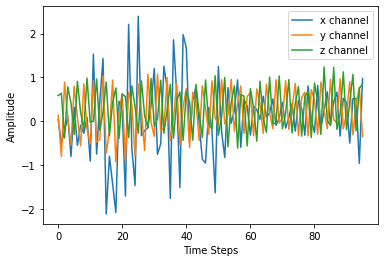

In [89]:
for i in range(10):
    plot_signal(resampled_fall_signals[i])

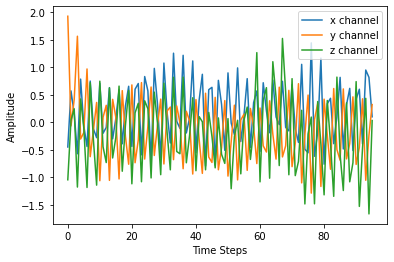

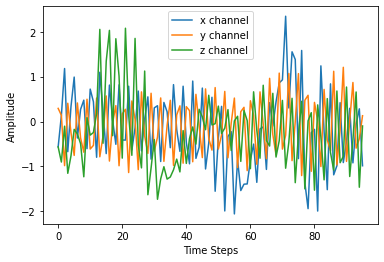

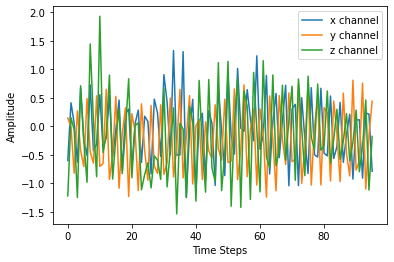

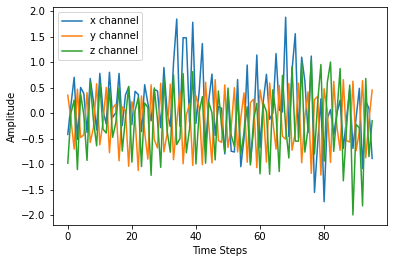

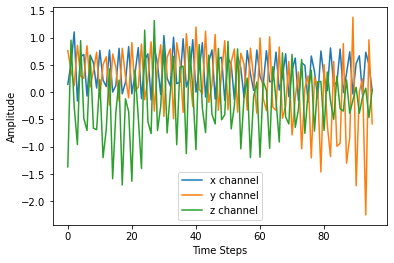

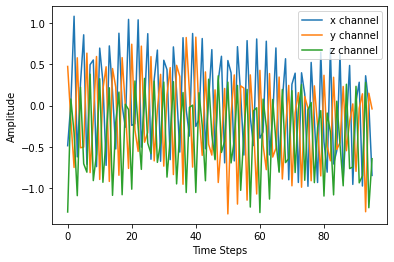

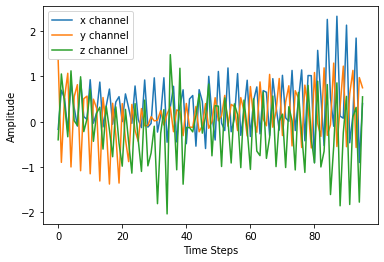

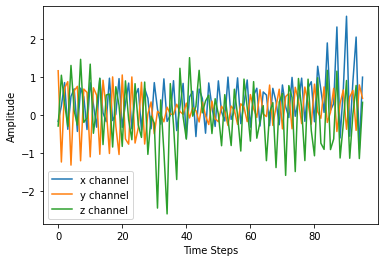

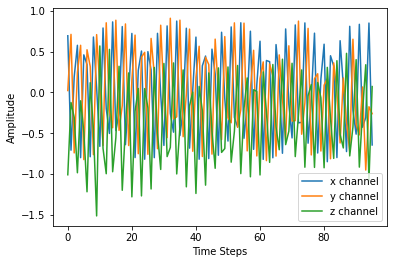

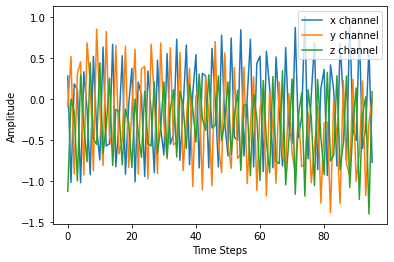

In [90]:
for i in range(10):
    plot_signal(resampled_not_fall_signals[i])

In [91]:
resampled_fall_signals = np.array(resampled_fall_signals)
print(resampled_fall_signals.shape)
resampled_not_fall_signals = np.array(resampled_not_fall_signals)
print(resampled_not_fall_signals.shape)

(390, 3, 96)
(362, 3, 96)


In [64]:

# assume you have multiple signals stored in a 3D NumPy array called `signals`
# with shape (num_signals, num_samples, num_channels)
def standarize_signals(signals):
    # Step 1: standardize each signal to a 0-1 scale
    min_values = np.min(signals, axis=(0, 1)) # get the minimum value of each channel
    max_values = np.max(signals, axis=(0, 1)) # get the maximum value of each channel
    standardized_signals = (signals - min_values) / (max_values - min_values)

    # Step 2: store the minimum and maximum values of each channel
    # you'll need these later to convert the signals back to their original scale
    min_values = np.tile(min_values, (signals.shape[0], signals.shape[1], 1))
    max_values = np.tile(max_values, (signals.shape[0], signals.shape[1], 1))

    # Step 3: perform any necessary calculations on the standardized signals
    # ...

    # Step 4: convert the standardized signals back to their original scale
    # original_scale_signals = standardized_signals * (max_values - min_values) + min_values

    return standardized_signals, min_values, max_values


In [92]:
standardized_fall_signals, fall_min_values, fall_max_values = standarize_signals(resampled_fall_signals)

In [93]:
standardized_not_fall_signals, not_fall_min_values, not_fall_max_values = standarize_signals(resampled_not_fall_signals)

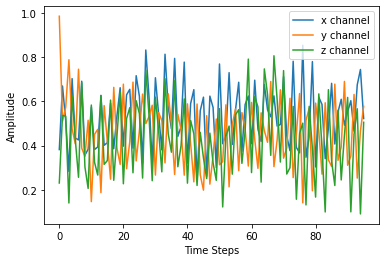

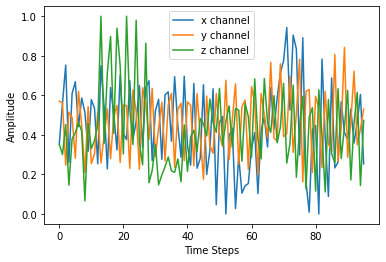

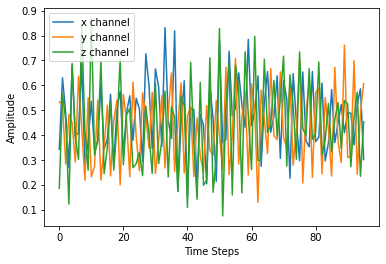

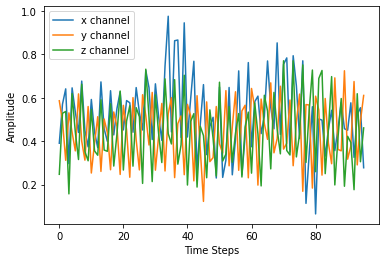

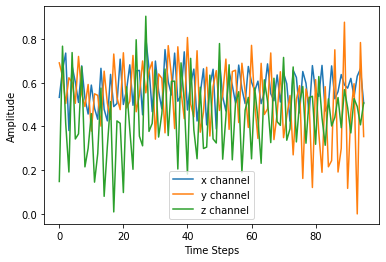

In [94]:
for i in range(5):
    plot_signal(standardized_not_fall_signals[i])

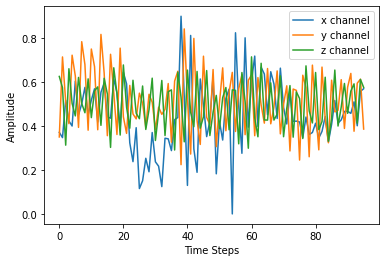

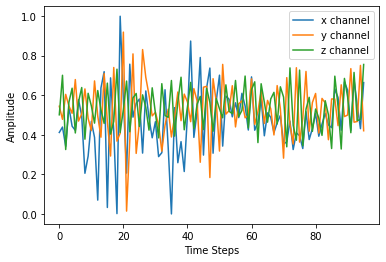

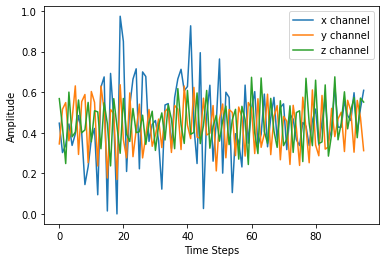

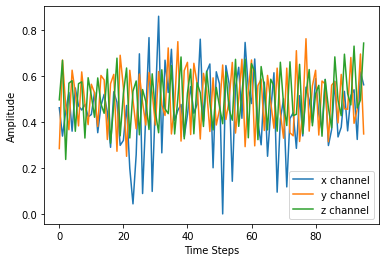

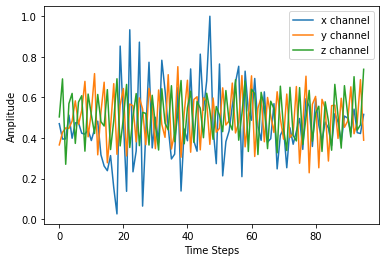

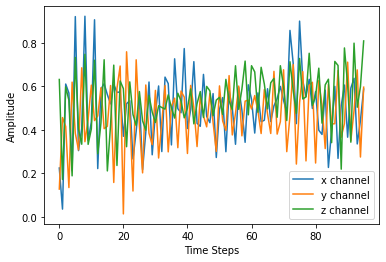

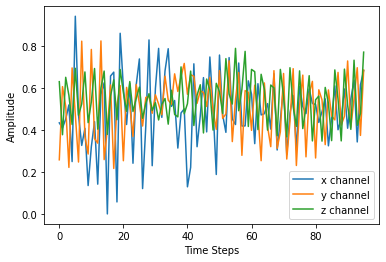

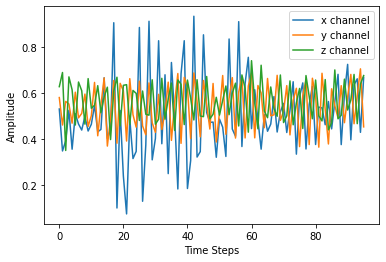

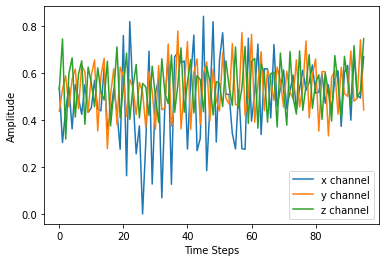

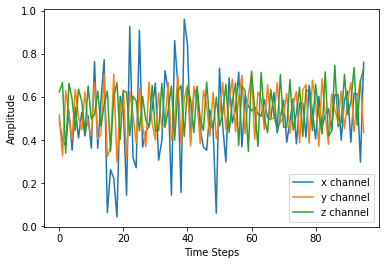

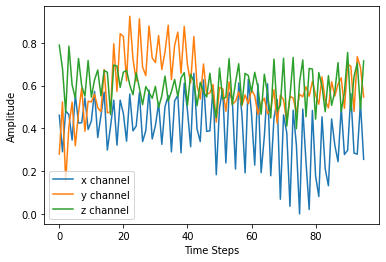

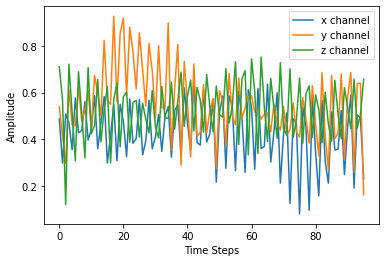

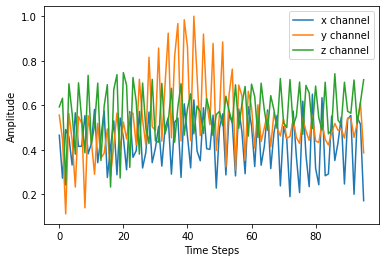

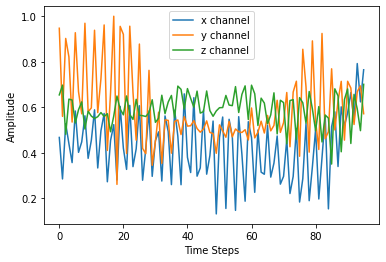

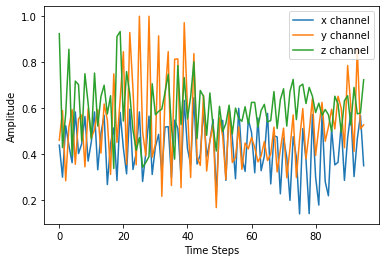

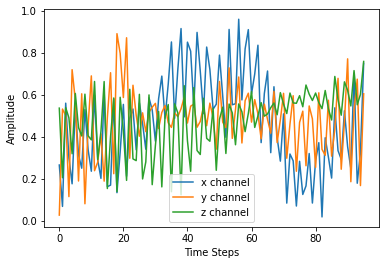

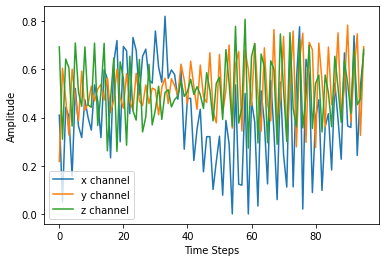

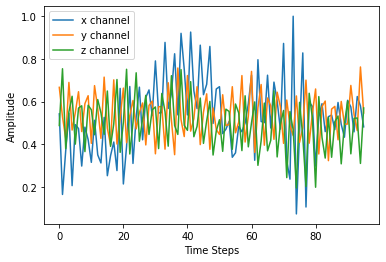

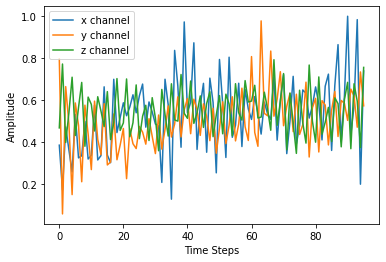

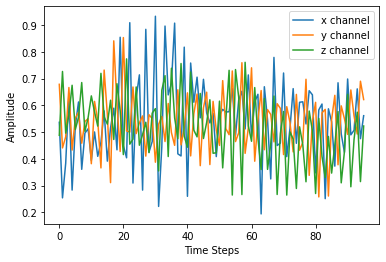

In [96]:
for i in range(20):
    plot_signal(standardized_fall_signals[i])

In [ ]:
# fall data somewhere did change properly, recheck it 

In [97]:
fall_min_values

array([[[-2.02944534, -2.17154585, -1.88634898, ..., -2.59819831,
         -2.31886812, -2.13908645],
        [-2.02944534, -2.17154585, -1.88634898, ..., -2.59819831,
         -2.31886812, -2.13908645],
        [-2.02944534, -2.17154585, -1.88634898, ..., -2.59819831,
         -2.31886812, -2.13908645]],

       [[-2.02944534, -2.17154585, -1.88634898, ..., -2.59819831,
         -2.31886812, -2.13908645],
        [-2.02944534, -2.17154585, -1.88634898, ..., -2.59819831,
         -2.31886812, -2.13908645],
        [-2.02944534, -2.17154585, -1.88634898, ..., -2.59819831,
         -2.31886812, -2.13908645]],

       [[-2.02944534, -2.17154585, -1.88634898, ..., -2.59819831,
         -2.31886812, -2.13908645],
        [-2.02944534, -2.17154585, -1.88634898, ..., -2.59819831,
         -2.31886812, -2.13908645],
        [-2.02944534, -2.17154585, -1.88634898, ..., -2.59819831,
         -2.31886812, -2.13908645]],

       ...,

       [[-2.02944534, -2.17154585, -1.88634898, ..., -2.5981983

In [2]:
from FallDataLoader import *

In [3]:
dataset = Fall_NotFall_loader()

(752, 3, 96)
(752,)


/home/x_l30/Diffusion/Diffusion_Research/FallDataLoader.py:96: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  filtered_not_fall_signals = np.array([signal for signal in all_not_fall_signals if len(signal) != 1])


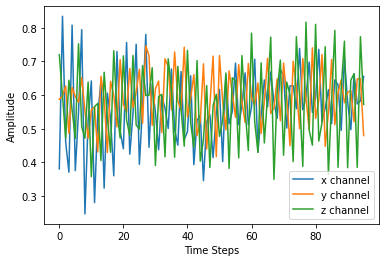

In [6]:
plot_signal(dataset.all_data[500])

In [7]:
print(dataset.all_labels[500:510])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
# load fall diffusion model, sample fall and not fall data, draw similarity graphs

In [2]:
from modules1D_cls_free import Unet1D_cls_free, GaussianDiffusion1D_cls_free
import numpy as np
import torch
import torch.nn as nn
from tqdm import tqdm

fall_model_path = '/home/x_l30/Diffusion/Diffusion_Research/checkpoint/DDPM1D_cls_free_Fall/checkpoint.pt'

device = "cuda:0"
num_classes = 2

model = Unet1D_cls_free(
    dim = 64,
    dim_mults = (1, 2, 4, 8),
    num_classes = num_classes,
    cond_drop_prob = 0.5,
    channels = 3).to(device)
ckpt = torch.load(fall_model_path)
model.load_state_dict(ckpt['model_state_dict'])

diffusion = GaussianDiffusion1D_cls_free(
    model,
    seq_length = 96,
    timesteps = 1000).to(device)

In [4]:
# create a torch tensor has 300 0s
class_0 = torch.Tensor([0] * 500).long().to(device)
sampled_not_fall = diffusion.sample(
    classes = class_0,
    cond_scale = 3.)

sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

In [5]:
class_0.size()

torch.Size([500])

In [6]:
# create a torch tensor has 300 1s
class_1 = torch.Tensor([1] * 500).long().to(device)
sampled_fall = diffusion.sample(
    classes = class_1,
    cond_scale = 3.)

sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

In [7]:
class_1.size()

torch.Size([500])

In [8]:
from FallDataLoader import *
dataset = Fall_NotFall_loader()
real_fall = dataset.standardized_fall_signals
real_not_fall = dataset.standardized_not_fall_signals

(752, 3, 96)
(752,)


/home/x_l30/Diffusion/Diffusion_Research/FallDataLoader.py:96: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  filtered_not_fall_signals = np.array([signal for signal in all_not_fall_signals if len(signal) != 1])


In [9]:
from visualization import *

In [10]:
sampled_not_fall = sampled_not_fall.to('cpu').detach().numpy()
sampled_fall = sampled_fall.to('cpu').detach().numpy()

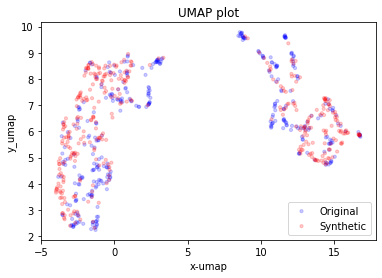

In [11]:
visualization(real_not_fall, sampled_not_fall, 'umap', 'unimib_not_fall')

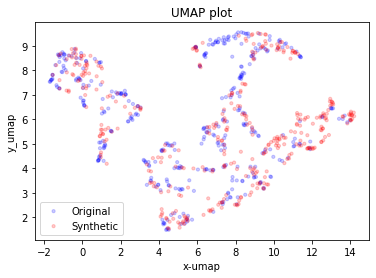

In [12]:
visualization(real_fall, sampled_fall, 'umap', 'unimib_fall')

In [13]:
def plot_signals_cls_free(signals, title):
    dim = signals.shape[1]
    fig, axs = plt.subplots(2, 5, figsize=(20,5))
    for i in range(2):
        for j in range(5):
            for k in range(dim):
                axs[i, j].plot(signals[i*5+j][k][:])
    fig.suptitle(title)
    fig.show()

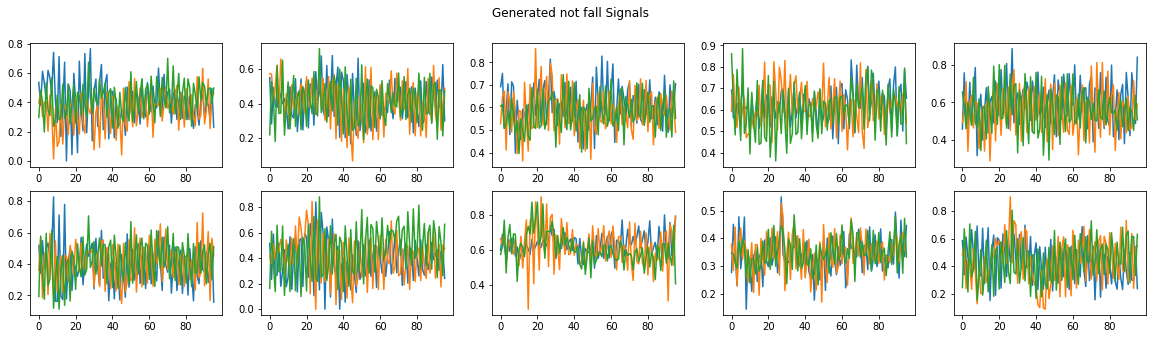

In [14]:
plot_signals_cls_free(sampled_not_fall, 'Generated not fall Signals')

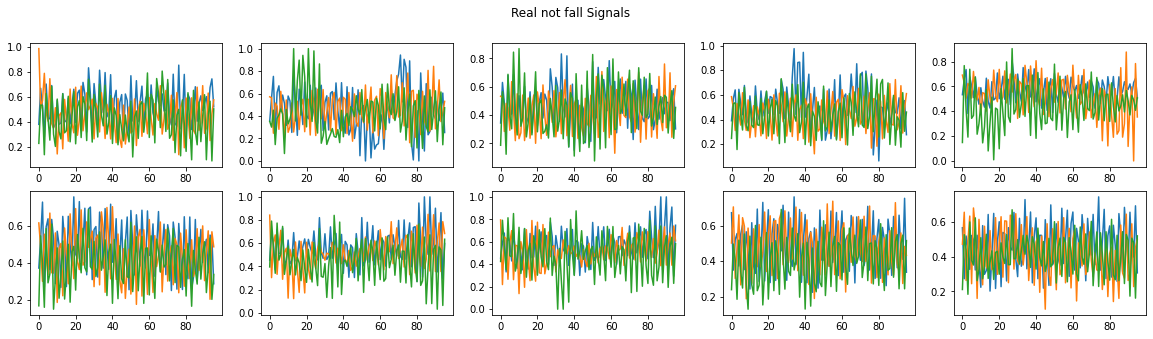

In [17]:
plot_signals_cls_free(real_not_fall, 'Real not fall Signals')

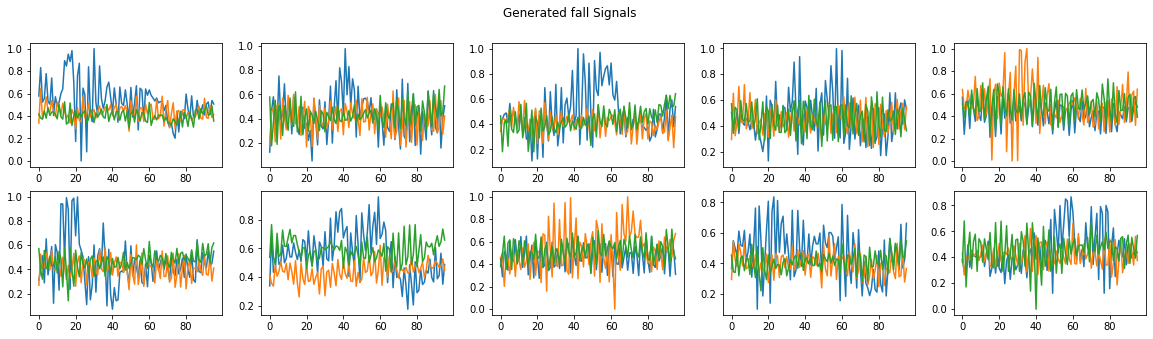

In [15]:
plot_signals_cls_free(sampled_fall, 'Generated fall Signals')

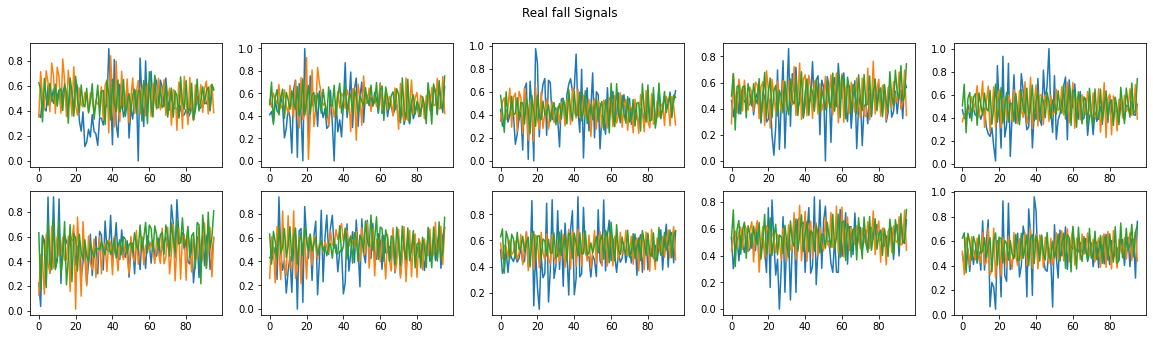

In [18]:
plot_signals_cls_free(real_fall, 'Real fall Signals')

In [16]:
import numpy as np

# Save the NumPy array to a file
np.save('sampled_not_fall.npy', sampled_not_fall)
np.save('sampled_fall.npy', sampled_fall)

# Load the NumPy array from the file
sampled_not_fall = np.load('sampled_not_fall.npy')
sampled_fall = np.load('sampled_fall.npy')


In [19]:
print(sampled_not_fall.shape)
print(sampled_fall.shape)

(500, 3, 96)
(500, 3, 96)
